<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/tp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

======================================= Introdução ========================================================
comeco do dataframe=
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
mostra o final do dataset=      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439  

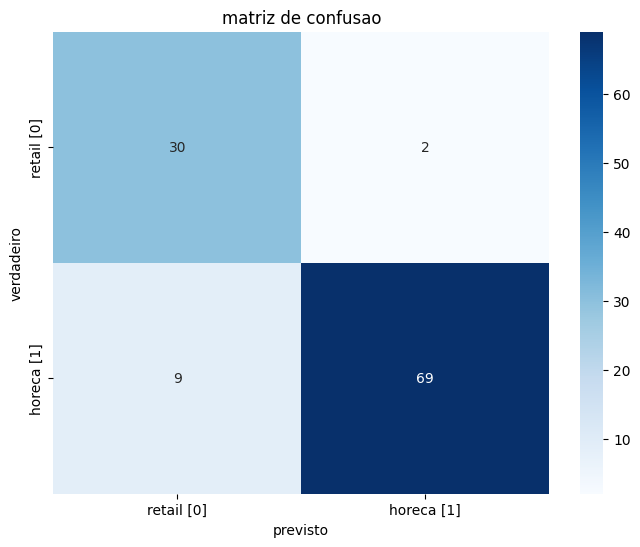

2) Execute o algoritmo XGBoost na mesma base (após os ajustes pedidos), utilizando apenas as configurações padrão do modelo. Apresente as mesmas métricas da questão acima.
APLICACAO DO MODELO XGBOOST [EXtreme Gradient Boosting]
modelo XGBoost iniciadoo.
treinando o modelo XGBoost.
previsoes com XGBoost feitas .

resultado do modelo XGBoost
acuracia global [XGBoost]: 92.73%

analise para a classe horeca [1]
precisao: 96.05%
recall: 93.59%
f1-score: 94.81%

analise para a Classe Retail [0]
precisao: 85.29%
recall: 90.62%
f1-score: 87.88%

#####################################################################################
relatorio de classificacao [XGBoost]
              precision    recall  f1-score   support

  retail [0]       0.85      0.91      0.88        32
  Horeca [1]       0.96      0.94      0.95        78

    accuracy                           0.93       110
   macro avg       0.91      0.92      0.91       110
weighted avg       0.93      0.93      0.93       110

matriz 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:37:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


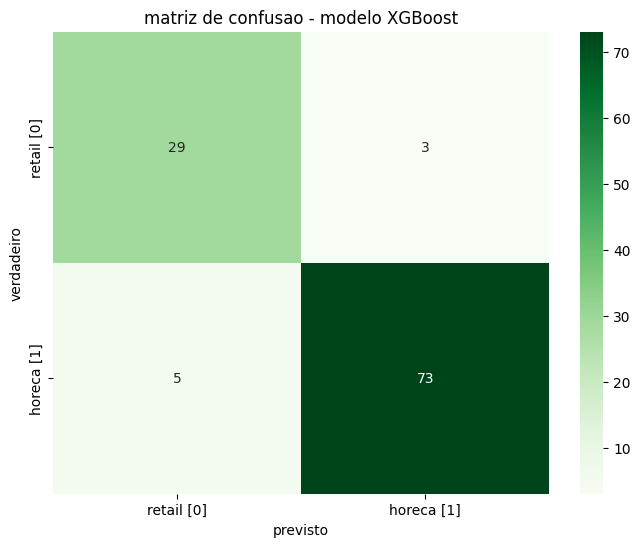

comparativo final dos modelos
Metrica        | Random Forest | XGBoost
------------------------------------------
Acuracia       | 90.00%        | 92.73%
f1 Horeca      | 92.62%        | 94.81%
f1 Retail      | 84.51%        | 87.88%


In [1]:
#importe
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


print("===========================================================================================================")
print("======================================= Introdução ========================================================")
print("===========================================================================================================")

#url do dataset
url = 'https://raw.githubusercontent.com/cassiusf/datasets/main/customers_data.csv'

#carregar os dados para um dataframe
df = pd.read_csv(url)

#verificar se os dados foram carregados
print("comeco do dataframe=")
print(df.head())

#final do dataframe
print("mostra o final do dataset=", df.tail())

#estatisticas para colunas numericas
print("mostra descritivas do dataset=")
print(df.describe())

#dados sobre as colunas e tipos de dados:
print("informações sobre o DataFrame=")
df.info()


#nomes das colunas
print("mostra nome das colunas=", df.columns)

print("===========================================================================================================")

print("Avalie a existência de dados ausentes e elimine estas observações.")
print("0.1: verificacao de dados ausentes por coluna=")
print(df.isnull().sum())
print("removendo linhas vazias")
df.dropna(inplace=True)

print("===========================================================================================================")

#remapiar os valores: 1 [Horeca], e 2 se torna 0 [Retail]
print("0.2: recodifique a variável alvo, utilizando (1) para Horeca (Hotel/Restaurant/Café) e (0) para Retail channel.")
df['Channel'] = df['Channel'].map({1: 1, 2: 0})



print("verificando quantidade da variavel channel")
# contagem de cada valor na coluna

print("xxxxxxxxxxxx  [Canal de Venda || Chanel] xxxxxxxxxxxx")
print(df['Channel'].value_counts())

print("1 = Horeca [ || Hoteis, Restaurantes, Cafeterias || ]")
print("0 = Retail [ || Varejo || ]")

print("separar o dataframe em Treino e Teste [75-25%]")
#variaveis preditoras [X] da variável alvo [y]
#X tem todas as colunas, exceto Channel
X = df.drop('Channel', axis=1)

#y tem apenas a coluna Channel
y = df['Channel']

#usar funcao train_test_split para dividir
print("0.3: separe o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%.")
print("test_size=0.25 = 25% dos dados p/ o conjunto de teste")
print("random_state=42 faz que a divisao seja unica"),
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("verificar dimensoes dos dataframes resultantes")

print("dimensoes apos a separacao em Treino e Teste=")
print("X_train [dados treino):", X_train.shape)
print("X_test [dados teste]:", X_test.shape)
print("y_train [alvo de treino]:", y_train.shape)
print("y_test [alvo  teste]:", y_test.shape)

#verificando a proporcao
total_linhas = len(df)
treino_linhas = len(X_train)
teste_linhas = len(X_test)

print(f"proporcao de treino: {treino_linhas / total_linhas:.2%}")
print(f"proporcao de teste: {teste_linhas / total_linhas:.2%}")

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#instanciando o modelo
print("1) Apresente as métricas acurácia, precision, recall e F1-score deste modelo. Apresente também a matriz de confusão resultante do processo de treinamento.\n")
#random_state=42 n° guia do mochileiro viajante
modelo = RandomForestClassifier(random_state=42)

#treinando o modelo com os dados de treino
modelo.fit(X_train, y_train)

#fazendo previsoes nos dados de teste
y_pred = modelo.predict(X_test)

####################################################################################################################
print("===========================================================================================================")

#calculando as metricas # Foco na classe positiva [1: Horeca]
acuracia = accuracy_score(y_test, y_pred)
print(f"acuracia global [total de acertos]: {acuracia:.2%}")

print("#####################################################################################")
#precisao = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)
#print("avaliacao do modelo random forest")
#print(f"acuracia: {acuracia:.2%}")
#print(f"precisao [p/ horeca]: {precisao:.2%}")
#print(f"recall [p/ horeca]: {recall:.2%}")
#print(f"f1-score [p/ horeca]: {f1:.2%}")
#print("relatorio de classificacao")
#target_names mapeia os numeros [0, 1] para nomes legiveis
#print(classification_report(y_test, y_pred, target_names=['Retail (0)', 'Horeca (1)']))

print("#####################################################################################")
#metricas com foco na classe horeca [1]
print("Analise para a classe horeca [1]")

precisao_horeca = precision_score(y_test, y_pred, pos_label=1) # usado pos_label=1 p/ focar na classe horeca
recall_horeca = recall_score(y_test, y_pred, pos_label=1)
f1_horeca = f1_score(y_test, y_pred, pos_label=1)
print(f"precisao: {precisao_horeca:.2%}")
print(f"recall: {recall_horeca:.2%}")
print(f"f1-score: {f1_horeca:.2%}")

print("#####################################################################################")
print("Analise para a classe retail [0]")
#metricas pos_label=0 para focar na classe Retail
precisao_retail = precision_score(y_test, y_pred, pos_label=0)
recall_retail = recall_score(y_test, y_pred, pos_label=0)
f1_retail = f1_score(y_test, y_pred, pos_label=0)
print(f"precisao: {precisao_retail:.2%}")
print(f"recall: {recall_retail:.2%}")
print(f"f1-score: {f1_retail:.2%}\n")



print("matriz de confusao")
print("[30,2]")
print("[9,69]")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['retail [0]', 'horeca [1]'],
            yticklabels=['retail [0]', 'horeca [1]'])
plt.title('matriz de confusao')
plt.ylabel('verdadeiro')
plt.xlabel('previsto')
plt.show()


print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

print("2) Execute o algoritmo XGBoost na mesma base (após os ajustes pedidos), utilizando apenas as configurações padrão do modelo. Apresente as mesmas métricas da questão acima.")
print("APLICACAO DO MODELO XGBOOST [EXtreme Gradient Boosting]")

import xgboost as xgb

#iniciar o modelo XGBoost com configurações padrao. random_state para garantir a reprodutibilidade dos resultados.use_label_encoder=False e eval_metric
xgb_modelo = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
print("modelo XGBoost iniciadoo.")


#treinamento e previsao
print("treinando o modelo XGBoost.")
xgb_modelo.fit(X_train, y_train)

#fazendo previsoes nos dados de teste. nova variavel para as previsoes.
y_pred_xgb = xgb_modelo.predict(X_test)
print("previsoes com XGBoost feitas .\n")


#Apresentacao das metricas e matriz de confusao

print("resultado do modelo XGBoost")

#acuracia global
acuracia_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"acuracia global [XGBoost]: {acuracia_xgb:.2%}\n")

#analise para a classe horeca [1]
print("analise para a classe horeca [1]")
precisao_horeca_xgb = precision_score(y_test, y_pred_xgb, pos_label=1)
recall_horeca_xgb = recall_score(y_test, y_pred_xgb, pos_label=1)
f1_horeca_xgb = f1_score(y_test, y_pred_xgb, pos_label=1)
print(f"precisao: {precisao_horeca_xgb:.2%}")
print(f"recall: {recall_horeca_xgb:.2%}")
print(f"f1-score: {f1_horeca_xgb:.2%}\n")

#analise para a classe retail [0]
print("analise para a Classe Retail [0]")
precisao_retail_xgb = precision_score(y_test, y_pred_xgb, pos_label=0)
recall_retail_xgb = recall_score(y_test, y_pred_xgb, pos_label=0)
f1_retail_xgb = f1_score(y_test, y_pred_xgb, pos_label=0)
print(f"precisao: {precisao_retail_xgb:.2%}")
print(f"recall: {recall_retail_xgb:.2%}")
print(f"f1-score: {f1_retail_xgb:.2%}\n")

#relatorio de classificaçao Resumo
print("#####################################################################################")
print("relatorio de classificacao [XGBoost]")
print(classification_report(y_test, y_pred_xgb, target_names=['retail [0]', 'Horeca [1]']))

#matriz de Confuso [XGBoost]
print("matriz de confusao [XGBoost]")
print("[29,3]")
print("[5,73]")

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['retail [0]', 'horeca [1]'],
            yticklabels=['retail [0]', 'horeca [1]'])
plt.title('matriz de confusao - modelo XGBoost')
plt.ylabel('verdadeiro')
plt.xlabel('previsto')
plt.show()


print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

print("comparativo final dos modelos")
print("Metrica        | Random Forest | XGBoost")
print("------------------------------------------")
print(f"Acuracia       | {accuracy_score(y_test, y_pred):.2%}        | {accuracy_score(y_test, y_pred_xgb):.2%}")
print(f"f1 Horeca      | {f1_score(y_test, y_pred, pos_label=1):.2%}        | {f1_score(y_test, y_pred_xgb, pos_label=1):.2%}")
print(f"f1 Retail      | {f1_score(y_test, y_pred, pos_label=0):.2%}        | {f1_score(y_test, y_pred_xgb, pos_label=0):.2%}")



#3) Qual modelo você utilizaria, a partir dos resultados da execução dos dois modelos? Justifique sua resposta.
# No documento PDF tem uma versão melhorada com tabela:


#Análise Comparativa de Desempenho
#O relatório tem o objetivo de analisar e comparar o desempenho de dois modelos de Ensemble Learning, Random Forest e XGBoost, aplicados à tarefa de classificação binária da variável Channel. Queremos selecionar o modelo que desempenha melhor e com maior poder preditivo para ser implementado, justificando a escolha com base em métricas de avaliação quantitativas e na análise da matriz de confusão.
#Análise de Métricas de Desempenho
#Os modelos foram treinados e avaliados no mesmo conjunto de dados de teste [25% do total], e os resultados abaixo:



#Métrica
#Random Forest
#XGBoost
#Acurácia
#90.00%
#92.73%
#f1-Score (Horeca - 1)
#92.62%
#94.81%
#F1-Score (Retail - 0)
#84.51%
#87.88%


#Acurácia: O modelo XGBoost mostrou uma superioridade inicial, tendo alcançado uma acurácia de 92.73%, superando o Random Forest em 2.7 por cento. Mostra uma maior taxa de acertos na classificação de todos os clientes.
#Para a [94.81% x. 92.62%], indicando um melhor balanço entre prever de forma correta os clientes Horeca e não classificar clientes de outro canal de forma errada [Horeca].
#Já para a classe minoritária Retail [0], o XGBoost também se destacou [87.88% x. 84.51%]. Um desempenho superior na classe minoritária que faz parecer que o modelo é mais generalizável e não está apenas aprendendo a classificar a classe mais frequente.
#Análise da Matriz de Confusão
#A análise dos erros de cada modelo fornece informações sobre seus pontos fracos:


#Random Forest: [[30, 2], [9, 69]]
#> Erros: Classificou 9 clientes Horeca como Retail [Falsos Negativos] e 2 clientes Retail como Horeca [Falsos Positivos]. O principal ponto de falha foram os erros para identificar corretamente uma parcela de clientes do canal Horeca.
#XGBoost: [[29, 3], [5, 73]]
#> Erros: Classificou 5 clientes Horeca como Retail [Falsos Negativos] e 3 clientes Retail como Horeca [Falsos Positivos].


#A comparação mostra que o XGBoost reduziu o número de Falsos Negativos em quase 50% [de 9 para 5] em relação ao Random Forest.
#Dependendo do objetivo do negócio, errar ao não identificar um cliente Horeca [Hotéis, Restaurantes e Cafeterias] pode ser mais custoso do que o erro oposto [Retail | Varejo]. Portanto, essa redução de erros é um forte indicativo da superioridade do XGBoost.

#Conclusão
#Com base na análise, o modelo XGBoost [Extreme Gradient Boosting] é a escolha recomendada.
#1-Superioridade Métrica Generalizada: O XGBoost teve melhor performance no Random Forest em todas as métricas-chave avaliadas: acurácia global e F1-Score para ambas as classes [majoritária e minoritária].
#2-Melhor Generalização: O desempenho superior na classe minoritária ['Retail'] mostra que o modelo XGBoost possui uma capacidade de generalização mais favorável, sendo mais confiável para classificar novos dados de ambos os canais.
#3-Redução de Erros Críticos: A diminuição do número de Falsos Negativos [clientes Horeca classificados incorretamente] sugere um modelo mais preciso na identificação da principal classe de interesse.
#4-Fundamento Teórico: Do ponto de vista teórico, algoritmos de boosting XGBoost, que constroem modelos de forma sequencial corrigindo os erros do modelo anterior, frequentemente superam algoritmos de baging como o Random Forest, que constroem árvores independentes. Os resultados práticos obtidos neste experimento corroboram essa premissa.
#### Random Forest teve menos Falsos Positivos [2 contra 3 do XGBoost]. Isso significa que ele foi mais cuidadoso ao classificar um cliente como "Horeca", errando menos vezes ao rotular um cliente que era Retail nesse treinamento.

